In [22]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import random
import matplotlib.pyplot as plt

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
    return images

def bgr_to_rgb(image): #open cv user bgr while matplot expects rgb
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
def display_random_images(images, n=2):
    random_indices = random.sample(range(len(images)), n)
    fig, axes = plt.subplots(1, n, figsize=(10, 5))

    for i, idx in enumerate(random_indices):
        rgb_image = bgr_to_rgb(images[idx])
        axes[i].imshow(rgb_image)
        axes[i].axis('off')

    plt.show()

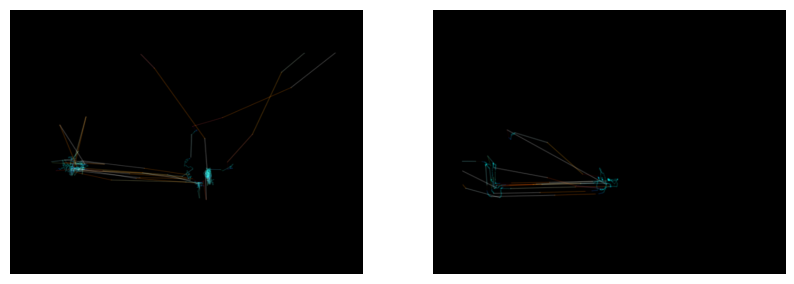

In [23]:
def preprocess_images(images):
    # Convert to grayscale and resize
    return [cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (224, 224)) for img in images]

folder_path_class1 = r'C:\Users\786me\Desktop\FinalYearProject\ASDScanPath\ASD\Augmented5x\Control'
folder_path_class2 = r'C:\Users\786me\Desktop\FinalYearProject\ASDScanPath\ASD\Augmented5x\Patient'

# Load images from each class folder
images_class1 = load_images_from_folder(folder_path_class1)
images_class2 = load_images_from_folder(folder_path_class2)

# Visualize random 2 images from class 1
display_random_images(images_class1)

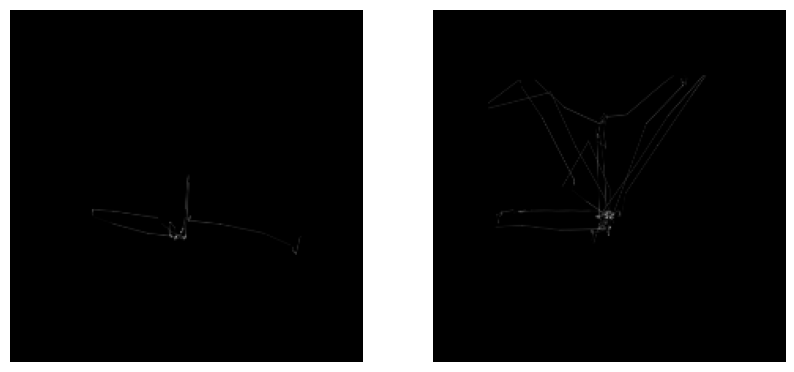

In [24]:
# Preprocess images and assign labels
preprocessed_images_class1 = preprocess_images(images_class1)
preprocessed_images_class2 = preprocess_images(images_class2)

X = np.array(preprocessed_images_class1 + preprocessed_images_class2)
y = np.array([0] * len(preprocessed_images_class1) + [1] * len(preprocessed_images_class2))

# Visualize random 2 images from class 1
display_random_images(preprocessed_images_class2)

In [25]:
# Split the data into train and test sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Add a channel dimension to the images
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [29]:
# Create the CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

Epoch 1/10
56/56 [==============================] - 23s 393ms/step - loss: 0.5883 - accuracy: 0.7216
Epoch 2/10
56/56 [==============================] - 22s 387ms/step - loss: 0.3851 - accuracy: 0.8258
Epoch 3/10
56/56 [==============================] - 22s 398ms/step - loss: 0.2851 - accuracy: 0.8896
Epoch 4/10
56/56 [==============================] - 23s 402ms/step - loss: 0.1955 - accuracy: 0.9339
Epoch 5/10
56/56 [==============================] - 21s 377ms/step - loss: 0.1114 - accuracy: 0.9681
Epoch 6/10
56/56 [==============================] - 22s 387ms/step - loss: 0.0553 - accuracy: 0.9888
Epoch 7/10
56/56 [==============================] - 22s 389ms/step - loss: 0.0288 - accuracy: 0.9978
Epoch 8/10
56/56 [==============================] - 22s 390ms/step - loss: 0.0139 - accuracy: 0.9978
Epoch 9/10
56/56 [==============================] - 22s 393ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 10/10
24/24 [==============================] - 2s 77ms/step - loss: 0.3089 - accuracy

24/24 [==============================] - 2s 80ms/step


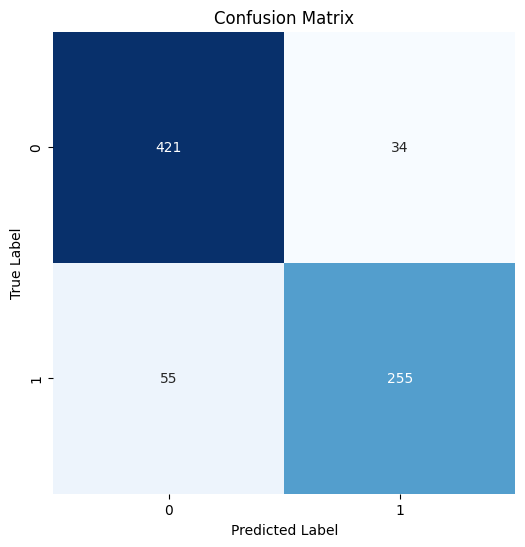

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Make predictions on the test data
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

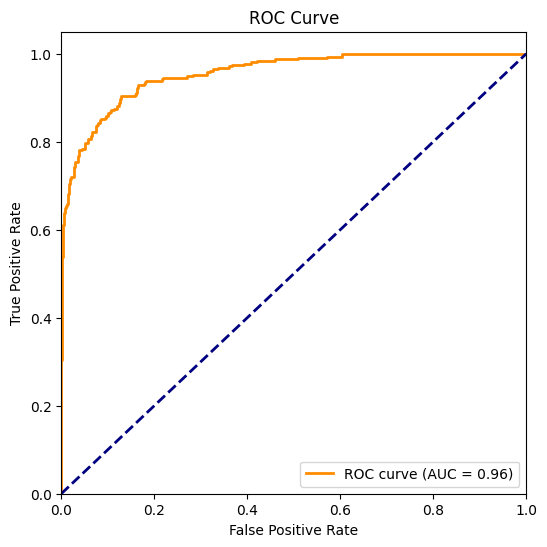

In [32]:
from sklearn.metrics import roc_curve, auc

# Calculate the false positive rate (FPR), true positive rate (TPR), and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [33]:
# Save the model to a file
model.save('CNNAugDS_model.h5')


1/1 [==============================] - 0s 40ms/step


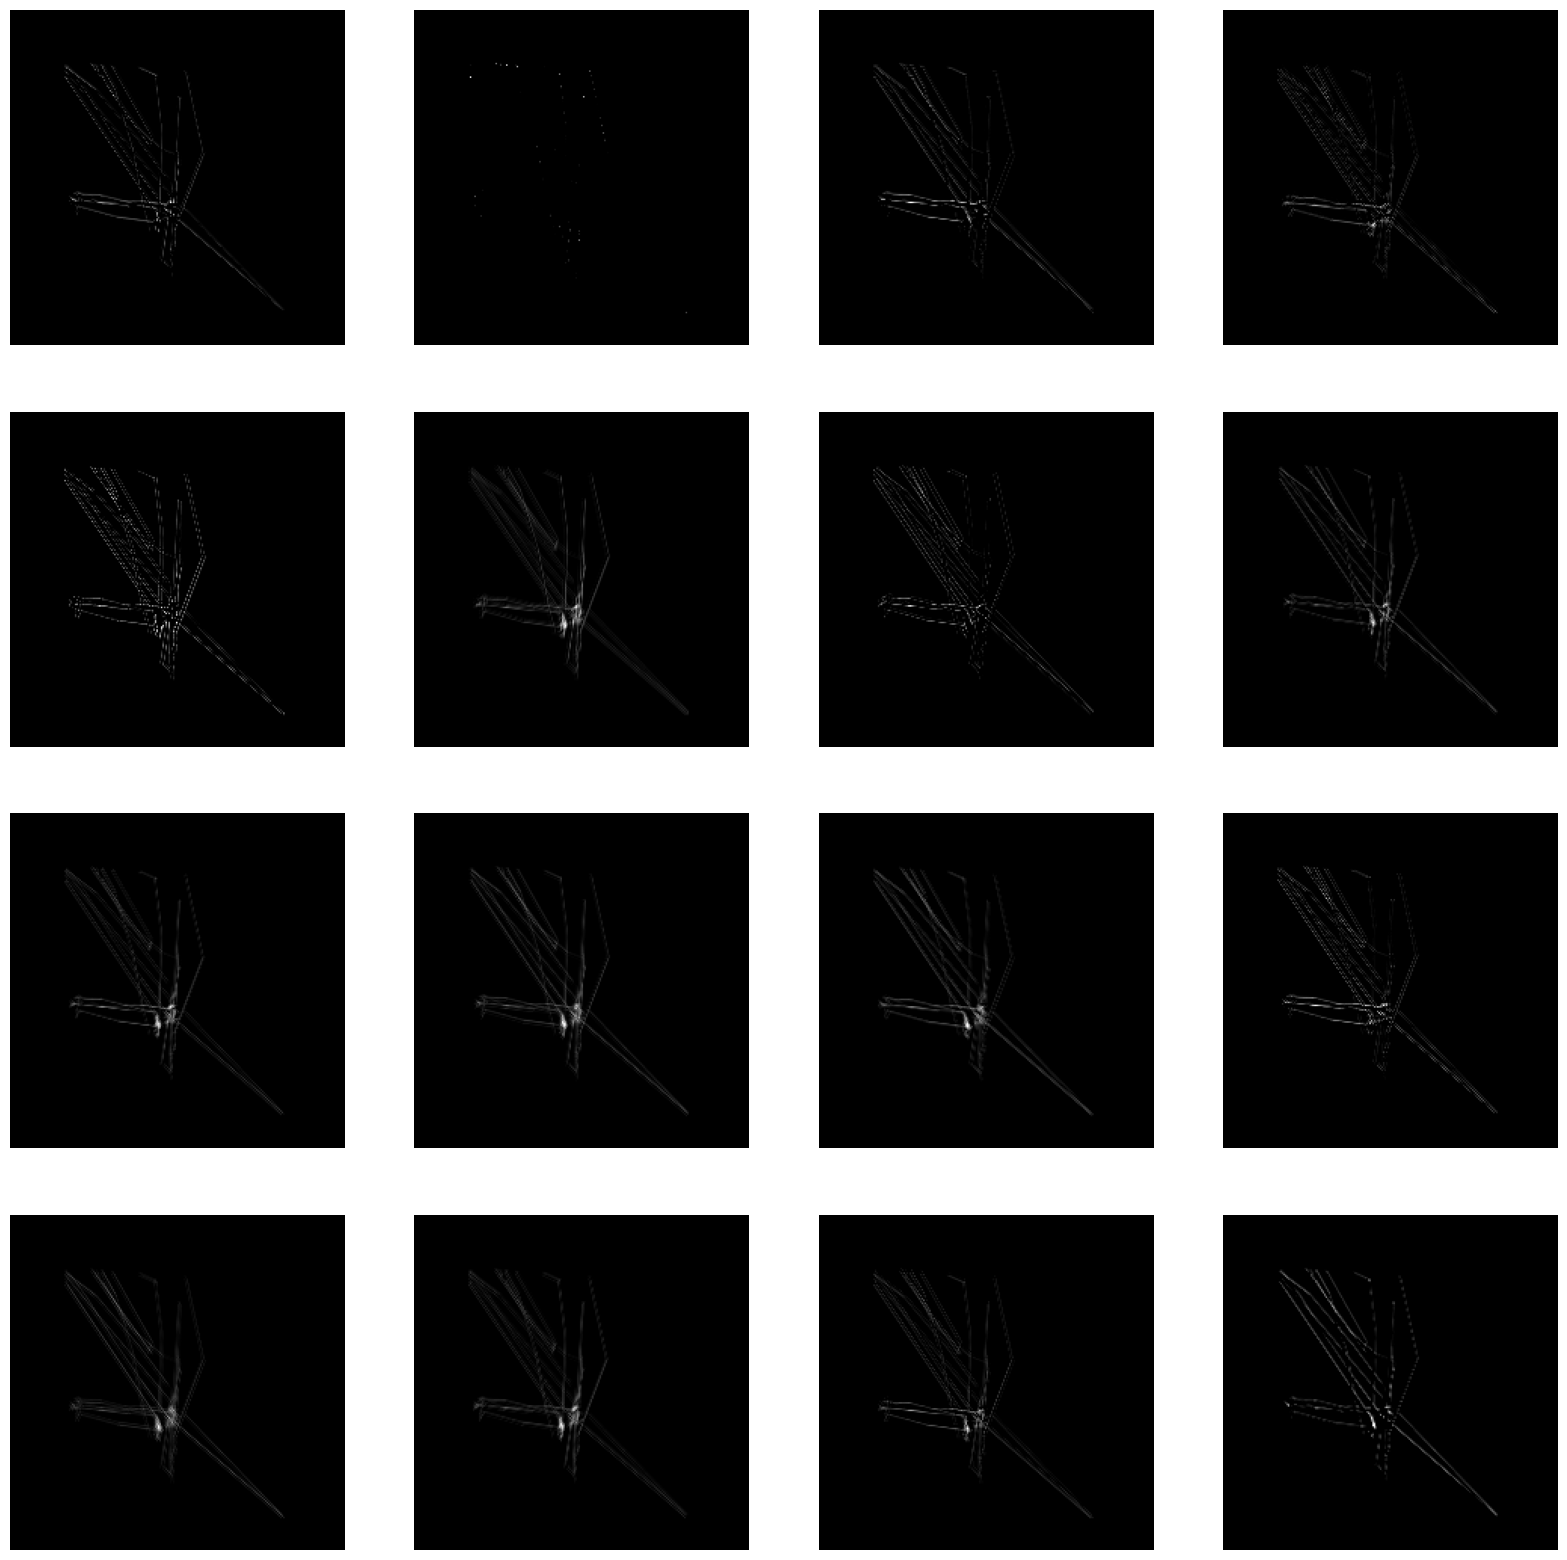

In [34]:
#Bonus visualising featue maps 
from tensorflow.keras.models import Model
# Get the first layer of the model
first_layer = model.layers[0]

# Create a new model with the same input as the original model and the output of the first layer
feature_map_model = Model(inputs=model.inputs, outputs=first_layer.output)

# Select a random preprocessed image
random_image = random.choice(X_test)

# Add a batch dimension to the image
random_image_batch = np.expand_dims(random_image, axis=0)

# Get the feature maps for the random image
feature_maps = feature_map_model.predict(random_image_batch)

# Visualize the feature maps
n_feature_maps = feature_maps.shape[-1]
n_columns = 4
n_rows = n_feature_maps // n_columns + int(n_feature_maps % n_columns != 0)

fig, axes = plt.subplots(n_rows, n_columns, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i in range(n_feature_maps):
    axes[i].imshow(feature_maps[0, :, :, i], cmap='gray')
    axes[i].axis('off')

plt.show()